# Customer Churn Prediction

In [1]:
# Python libraries for data analysis
import numpy as np 
import pandas as pd 

# adjust pandas display settings
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 100)

# Visualization libraries
import matplotlib.pyplot as plt 
# Plotting Style
plt.style.use('Solarize_Light2')

# visualization libraries
import matplotlib.pyplot as plt

# Plotting Style
plt.style.use('Solarize_Light2')

# Set the default figure size
plt.rcParams["figure.figsize"] = (10, 6)

import seaborn as sns

import cufflinks as cf
cf.go_offline()

# random state
rdm_st =123

# palette
palette='Set2'

In [2]:
# Helper Functions

def count_plot(cols:list, nrows:int, ncols:int, df:pd.DataFrame, hue:str='Churn', palette:str='Set2') -> 'sns countplot':
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 7))

    for idx, col in enumerate(cols):
        if nrows == 1:
            ax = axs[idx]
            sns.countplot(data=data1, x=col, hue=targ, ax=ax, palette=palette)
            ax.set_title(f"Bar Plot of {col}", size=15, color='red')
            
        else:   # if nrows > 1
            ax = axs[idx // ncols, idx % ncols]
            sns.countplot(data=data1, x=col, hue=targ, ax=ax, palette=palette)
            ax.set_title(f"Bar Plot of {col}", size=15, color='red')
            
            
        # Annotate the plots
        for bar in ax.patches:
            x_val = bar.get_x() + bar.get_width() / 2       # x pos
            y_val = bar.get_height()                        # y pos
            ax.annotate(text=y_val,                         # text pos
                        xy=(x_val, y_val),                  # (x, y)
                        xytext=(0, 6),                      # text position
                        ha='center',                        # horizontal alignment
                        va='center',                        # vertical alignment
                        size=12,                            # text size
                        textcoords='offset points')         # text coordinates???

    fig.tight_layout()
    plt.show()


    
def annotated_barplot(col:str, targ:str, df:pd.DataFrame, palette:str='Set2') -> 'boxplot':
    
    a = df.groupby(col)[targ].value_counts(normalize=True)  # convert the value counts of the groupby to fraction between 0 and 1
    a = a.mul(100)   # convert to percentage
    a = a.rename('Percent').reset_index()  # rename the column and reset the index
    
    # make plot
    nrows, ncols = 1, 1
    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 5))
    ax = sns.barplot(x=col, y='Percent', hue=targ, data=a, palette=palette)
    ax.set_title(f"Bar Plot of {col} Showing Customers That Churned", size=15, weight='bold')
    
    # Annotate the plots
    for bar in ax.patches:
        x_val = bar.get_x() + bar.get_width() / 2       # x pos
        y_val = bar.get_height()                        # y pos
        ax.annotate(text=f"{round(y_val, 1)}%",         # text pos
                    xy=(x_val, y_val),                  # (x, y)
                    xytext=(0, 6),                      # text position
                    ha='center',                        # horizontal alignment
                    va='center',                        # vertical alignment
                    size=12,                            # text size
                    textcoords='offset points')         # text coordinates???

    fig.tight_layout()
    plt.show()
    

    
from IPython.display import display_html
from itertools import chain,cycle

def display_side_by_side(*args,titles=cycle([''])):
    """It enables dataframes to be displayed side by side."""
    
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
        
    display_html(html_str,raw=True)
    

In [3]:
# load the data
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
# Column names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Check for NULL values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data1 = data.copy()

# drop the unnecessary column(s)
data1 = data1.drop(columns=['customerID'])

# convert column nmaes to series
cols = data1.columns.to_series()

# group the column names by datatypes (of the dataframe)
cols.groupby(data1.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

* **From the dict shown above, `TotalCharges` is a Pandas object instead of a numerical datatype**

In [8]:
# 'TotalCharges' contains 'whitespaces'
filter_whitespaces = data1['TotalCharges'].str.contains(r"[\s]")
len(data1.loc[filter_whitespaces, 'TotalCharges'])

11

In [9]:
# replace 'whitespaces' with 'NaN'
data1['TotalCharges'] = np.where(data1['TotalCharges'] == ' ', np.nan, data1['TotalCharges'])

# convert to numerical datatype
data1['TotalCharges'] = data1['TotalCharges'].astype('float')

# drop the 'NaN' values
data1 = data1.dropna()

In [10]:
# target feature
targ = 'Churn'

# characteristics of the customers
cust_feats = ['gender', 'Partner', 'Dependents', 'SeniorCitizen']

# numerical features
num_feats = ['tenure', 'MonthlyCharges', 'TotalCharges']  

# customer transaction history
trn_history = ['Contract', 'tenure', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod', 'PaperlessBilling']

# services oferred by the telecommunication company
telco_feats = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', ]


In [11]:
# descriptive Statistics
data1[num_feats].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Univariate Analysis

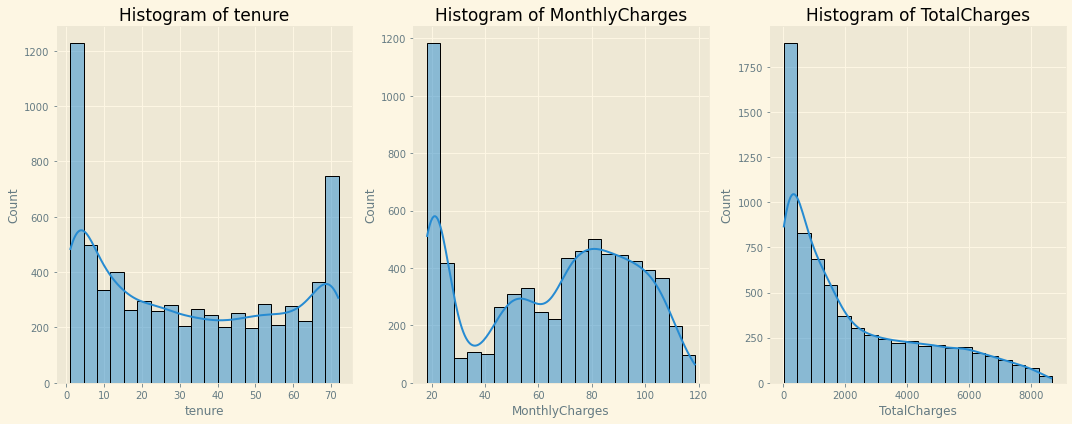

In [12]:
# Histogram of numerical features
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for idx, col in enumerate(num_feats):
    ax = axs[idx]
    sns.histplot(data=data1, x=col, kde=True, ax=ax, bins=20)
    ax.set_title(f"Histogram of {col}", size=17)
    
fig.tight_layout()
plt.show()

**Comment:**
* It seems that the number of customers with `tenure` < 10 months and `tenure` of about 70 months is very high.
* The distribution of `MonthlyCharges` does not follow a normal distribution. It appears that the `MonthlyCharges` of the customers fall into two categories and this may as a result of the contract type. The first category spend on average about 20 dollars while the secon category speand 80 dollars monthly.
* The distribution of `TotalCharges` follows an exponential distribution.

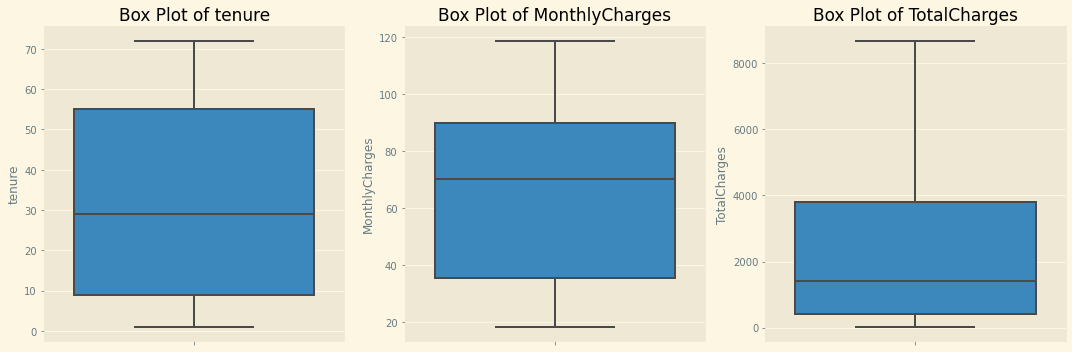

In [13]:
# Box plot of the numerical features
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(num_feats):
    ax = axs[idx]
    sns.boxplot(data=data1, y=col, ax=ax)
    ax.set_title(f"Box Plot of {col}", size=17)
    
fig.tight_layout()
plt.show()

No     5163
Yes    1869
Name: Churn, dtype: int64






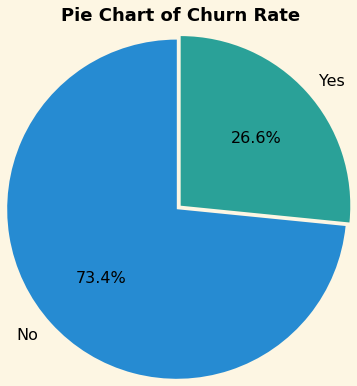

In [14]:
# Visualize the target
a = data1['Churn'].value_counts()
print(a)
print(f"\n\n\n")

plt.pie(x=a.values, explode=[0.04, 0], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'size': 16}, radius=1.3)
plt.title('Pie Chart of Churn Rate', size=18, weight='bold', y=1.05)

plt.show()

**Comment:**
* The **churn rate** is **~27%**

<br>

In [15]:
# Customer features
for col in cust_feats:
    v = data1[col].value_counts(normalize=True).apply(lambda x: f"{round((x*100), 1)}%")   # round the percentage value counts of each feature
    print(f"{col} \n{v}")
    print("==" * 30)

gender 
Male      50.5%
Female    49.5%
Name: gender, dtype: object
Partner 
No     51.7%
Yes    48.3%
Name: Partner, dtype: object
Dependents 
No     70.2%
Yes    29.8%
Name: Dependents, dtype: object
SeniorCitizen 
0    83.8%
1    16.2%
Name: SeniorCitizen, dtype: object


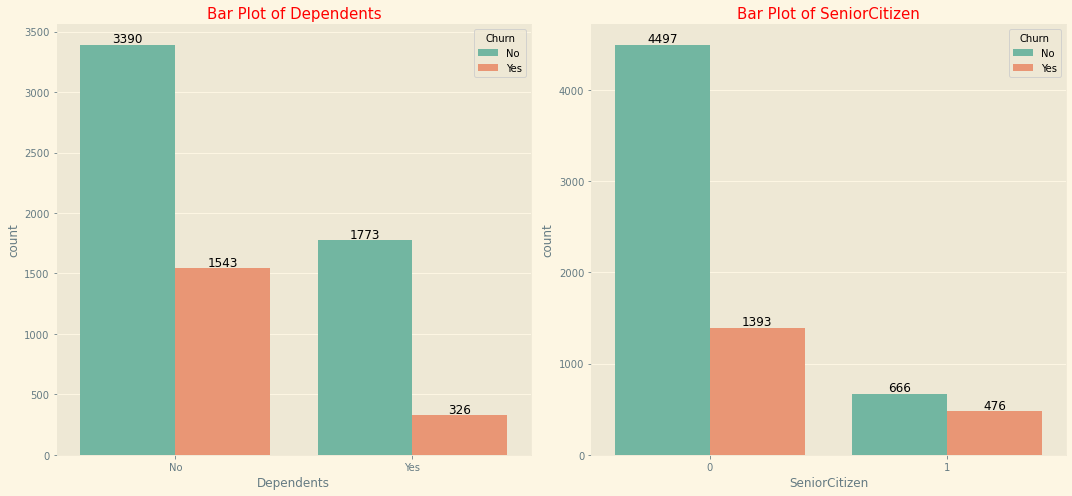

In [16]:
# Customer features
count_plot(['Dependents', 'SeniorCitizen'], 1, 2, data1, 'tab10')

<br>

**Comment:**
* `Gender` and `Partner` are fairly balanced features.
* Most customers are Not `Senior Citizens` and also have No `Dependents`.


In [17]:
# Transaction History features
for col in ['Contract', 'PaymentMethod', 'PaperlessBilling']:
    v = data1[col].value_counts(normalize=True).apply(lambda x: f"{round((x*100), 1)}%")   # round the percentage value counts of each feature
    print(f"{col} \n{v}")
    print("==" * 30)

Contract 
Month-to-month    55.1%
Two year          24.0%
One year          20.9%
Name: Contract, dtype: object
PaymentMethod 
Electronic check             33.6%
Mailed check                 22.8%
Bank transfer (automatic)    21.9%
Credit card (automatic)      21.6%
Name: PaymentMethod, dtype: object
PaperlessBilling 
Yes    59.3%
No     40.7%
Name: PaperlessBilling, dtype: object


<br>

**Comment:**
* For the `Contract` type, most customers are on a **Month-to-month** contract.
* **Electronic check** is the most common `PaymentMethod` type.


In [18]:
# Services oferred by the telecommunication company
for col in telco_feats:
    v = data1[col].value_counts(normalize=True).apply(lambda x: f"{round((x*100), 1)}%")   # round the percentage value counts of each feature
    print(f"{col} \n{v}")
    print("==" * 30)

PhoneService 
Yes    90.3%
No      9.7%
Name: PhoneService, dtype: object
MultipleLines 
No                  48.1%
Yes                 42.2%
No phone service     9.7%
Name: MultipleLines, dtype: object
InternetService 
Fiber optic    44.0%
DSL            34.4%
No             21.6%
Name: InternetService, dtype: object
OnlineSecurity 
No                     49.7%
Yes                    28.7%
No internet service    21.6%
Name: OnlineSecurity, dtype: object
OnlineBackup 
No                     43.9%
Yes                    34.5%
No internet service    21.6%
Name: OnlineBackup, dtype: object
DeviceProtection 
No                     44.0%
Yes                    34.4%
No internet service    21.6%
Name: DeviceProtection, dtype: object
TechSupport 
No                     49.4%
Yes                    29.0%
No internet service    21.6%
Name: TechSupport, dtype: object
StreamingTV 
No                     39.9%
Yes                    38.4%
No internet service    21.6%
Name: StreamingTV, dtype: objec

<br>

* A high percentage of the customers did **NOT** opt for the `Services` provided by the Telecoms Company.

Yes    6352
No      680
Name: PhoneService, dtype: int64






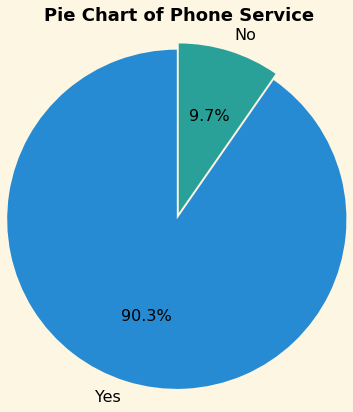

In [19]:
a = data1['PhoneService'].value_counts()
print(a)
print(f"\n\n\n")

plt.pie(x=a.values, explode=[0.05, 0], labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, textprops={'size': 16}, radius=1.3)
plt.title('Pie Chart of Phone Service', size=18, weight='bold', y=1.07)

plt.show()

<br>

**Comment:**
* Most customers opted for `PhoneService`.

<br>

### Multivariate Analysis

#### Numerical Features

In [20]:
data1.pivot_table(index=targ)

# # OR
# df.groupby('Churn').mean()

,MonthlyCharges,SeniorCitizen,TotalCharges,tenure
Churn,,,,
No,61.307408,0.128995,2555.344141,37.650010
Yes,74.441332,0.254682,1531.796094,17.979133


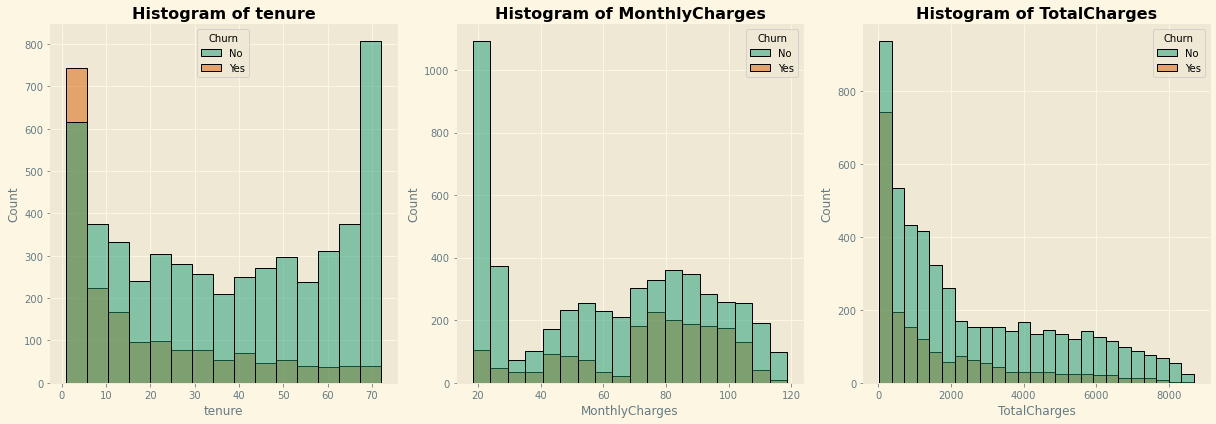

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

for (idx, col) in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    ax = axs[idx] 
    sns.histplot(x=col, data=data1, hue=targ, ax=ax, palette='Dark2')
    ax.set_title(f"Histogram of {col}", weight='bold')

fig.tight_layout()
plt.show()

<br>

**Comment:**
* Customers that churned had a shorter `tenure`. The loyal customers had a longer `tenure`.
* `MonthlyCharges`: A lot of customers that churned spent about **70** to **110** dollars monthly while a lot of customers that did not churn spent between **20** to **30** dollars 
* As the `TotalCharges` increases, the count of customers reduces.

<br>


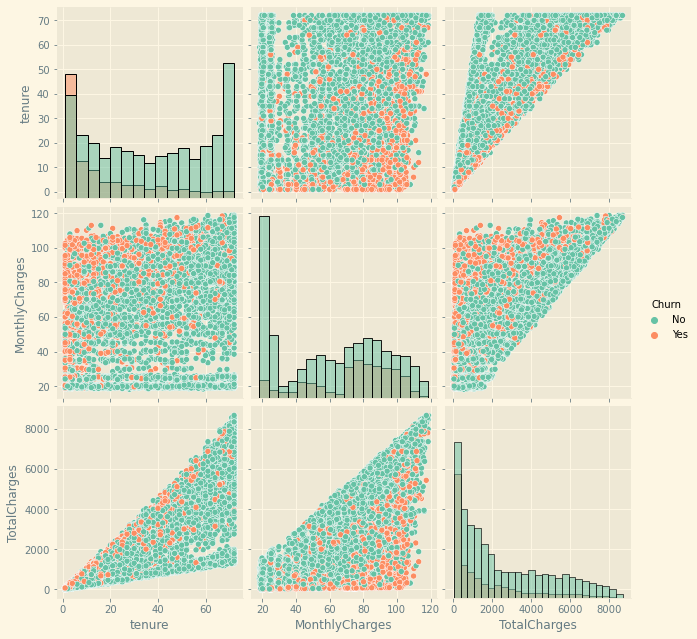

In [22]:
d = data1[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']] 
sns.pairplot(data=d, hue=targ, diag_kind='hist', height=3, palette=palette)

**Comment:**
* `TotalCharges` is positively correlated with `tenure` and `MonthlyCharges`.

<br>

#### Customer Demography

In [23]:
data2 = data1.copy()

# Add counter
data2['Count'] = 1

In [24]:
# a = pd.crosstab(index=data1[targ], columns=data2['gender'], normalize='columns')
# b = pd.crosstab(index=data1[targ], columns=data2['Partner'], normalize='columns')
# c = pd.crosstab(index=data1[targ], columns=data2['SeniorCitizen'], normalize='columns')
d = pd.crosstab(index=data1[targ], columns=data2['SeniorCitizen'], normalize='columns', margins=True)

display_side_by_side(d, titles=['Customer Churn Rate For Dependents'])

SeniorCitizen,0,1,All
Churn,,,
No,0.763497,0.583187,0.734215
Yes,0.236503,0.416813,0.265785


**Comment:**
* Customer churn rate is high **(42%)** for customers with `Dependents`.
* The churn rate for other customer demography (Gender, Partner, SeniorCitizen) isn't too high.

<br>

#### Services offered by the Telco

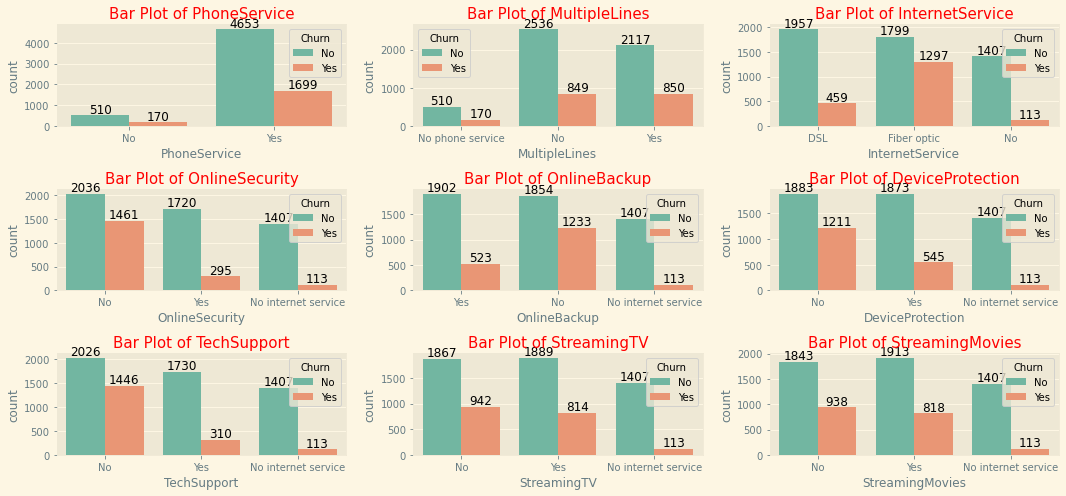

In [25]:
# Count plot of the Services offered by the Telco
count_plot(telco_feats, 3, 3, data1)

**Comment:**
* It seems the customer churn rate is higher when there are **no additional services** provided by the Telecoms company.
* `InternerService`, `OnlineSecurity`, `OnlineBackup`, and `TechSupport` will be further explored.

In [26]:
a = pd.crosstab(index=data1[targ], columns=data2['InternetService'], values=data2['Count'], aggfunc=np.sum, margins=True)
a = a / a.loc['All']

b = pd.crosstab(index=data1[targ], columns=data2['OnlineSecurity'], normalize='columns')
c = pd.crosstab(index=data1[targ], columns=data2['OnlineBackup'], normalize='columns')
d = pd.crosstab(index=data1[targ], columns=data2['DeviceProtection'], normalize='columns')
e = pd.crosstab(index=data1[targ], columns=data2['TechSupport'], normalize='columns')

print("Frequency Tables")
display_side_by_side(a, b, e, titles=['Customer Churn Rate For InternetService', 'Customer Churn Rate For OnlineSecurity', 'Customer Churn Rate For TechSupport'])

Frequency Tables


Customer Churn Rate For InternetService 
 
 
 InternetService 
 DSL 
 Fiber optic 
 No 
 All 
 
 
 Churn 
 
 
 
 
 
 
 
 
 No 
 0.810017 
 0.581072 
 0.925658 
 0.734215 
 
 
 Yes 
 0.189983 
 0.418928 
 0.074342 
 0.265785 
 
 
 All 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 Customer Churn Rate For OnlineSecurity 
 
 
 OnlineSecurity 
 No 
 No internet service 
 Yes 
 
 
 Churn 
 
 
 
 
 
 
 
 No 
 0.582213 
 0.925658 
 0.853598 
 
 
 Yes 
 0.417787 
 0.074342 
 0.146402 
 
 
 Customer Churn Rate For TechSupport 
 
 
 TechSupport 
 No 
 No internet service 
 Yes 
 
 
 Churn 
 
 
 
 
 
 
 
 No 
 0.583525 
 0.925658 
 0.848039 
 
 
 Yes 
 0.416475 
 0.074342 
 0.151961

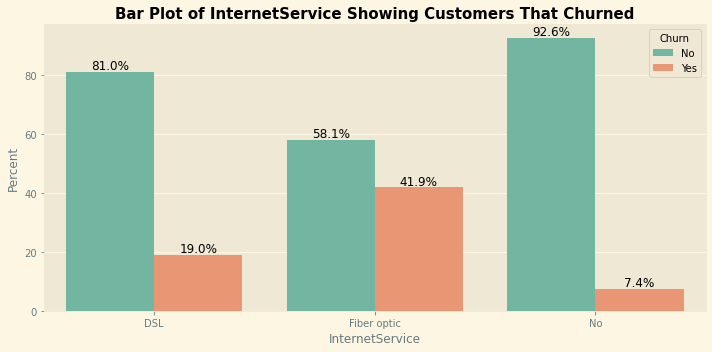

In [27]:
annotated_barplot('InternetService', targ, data2)

**Comment:**
* About 42% of customers using **Fiber optic** `InternetService` churned. This is a pretty high percentage.
* 42% of customers using **No** `OnlineSecurity`, `TechSupport` also churned.

<br>

#### Customer transaction history

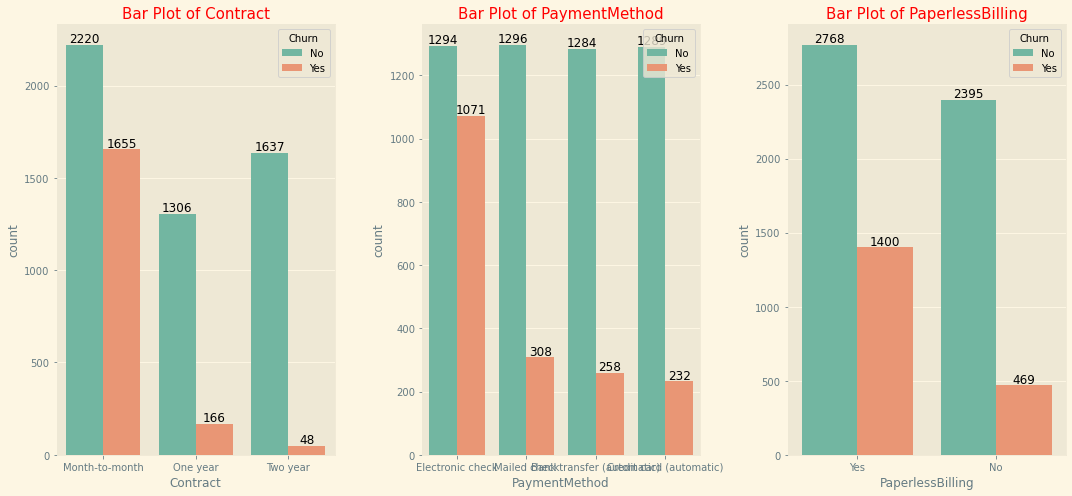

In [28]:
count_plot(['Contract', 'PaymentMethod', 'PaperlessBilling'], 1, 3, data2, targ)

In [29]:
# Let's explore 'PaymentMethod' further
pd.crosstab(index=data1[targ], columns=data2['PaymentMethod'], normalize='columns')

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,0.832685,0.847469,0.547146,0.80798
Yes,0.167315,0.152531,0.452854,0.19202


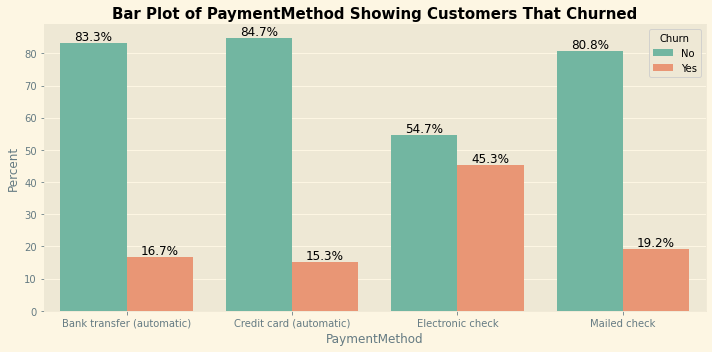

In [30]:
annotated_barplot('PaymentMethod', targ, data2)

**Comment:**
* A high pecentage **(45%)** of customers that made payment using **Electronic check** churned.

<br>

### Data Preprocessing

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
data3 = data1.copy()

le = LabelEncoder()

for col, dtype in zip(data3.columns, data3.dtypes):
    if dtype == 'O':
        # fit
        le.fit(data3[col])
        
        # transform
        data3[col] = le.transform(data3[col])
        
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


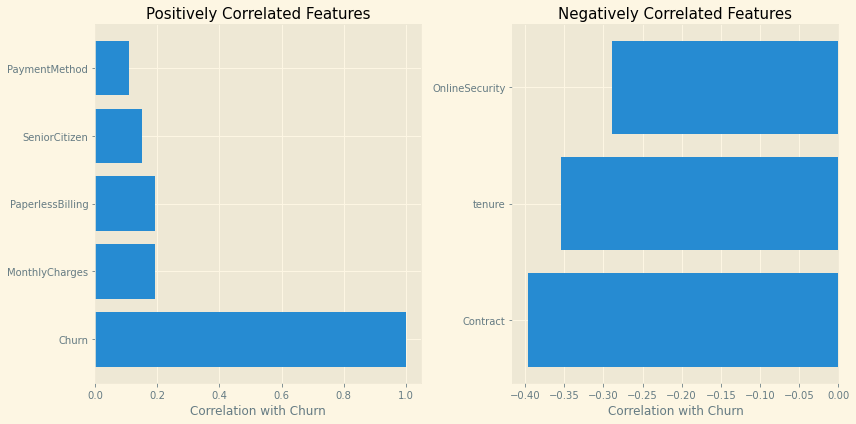

In [33]:
# Determine the features that are most correlated with the target
pos_corr = data3.corr()[targ].sort_values(ascending=False)[:5]
neg_corr = data3.corr()[targ].sort_values(ascending=True)[:3]

# correlated features
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].barh(y=pos_corr.index, width=pos_corr.values) 
axs[0].set_xlabel('Correlation with Churn')
axs[0].set_title('Positively Correlated Features', size=15)

axs[1].barh(y=neg_corr.index, width=neg_corr.values) 
axs[1].set_xlabel('Correlation with Churn')
axs[1].set_title('Negatively Correlated Features', size=15)

fig.tight_layout()
plt.show()

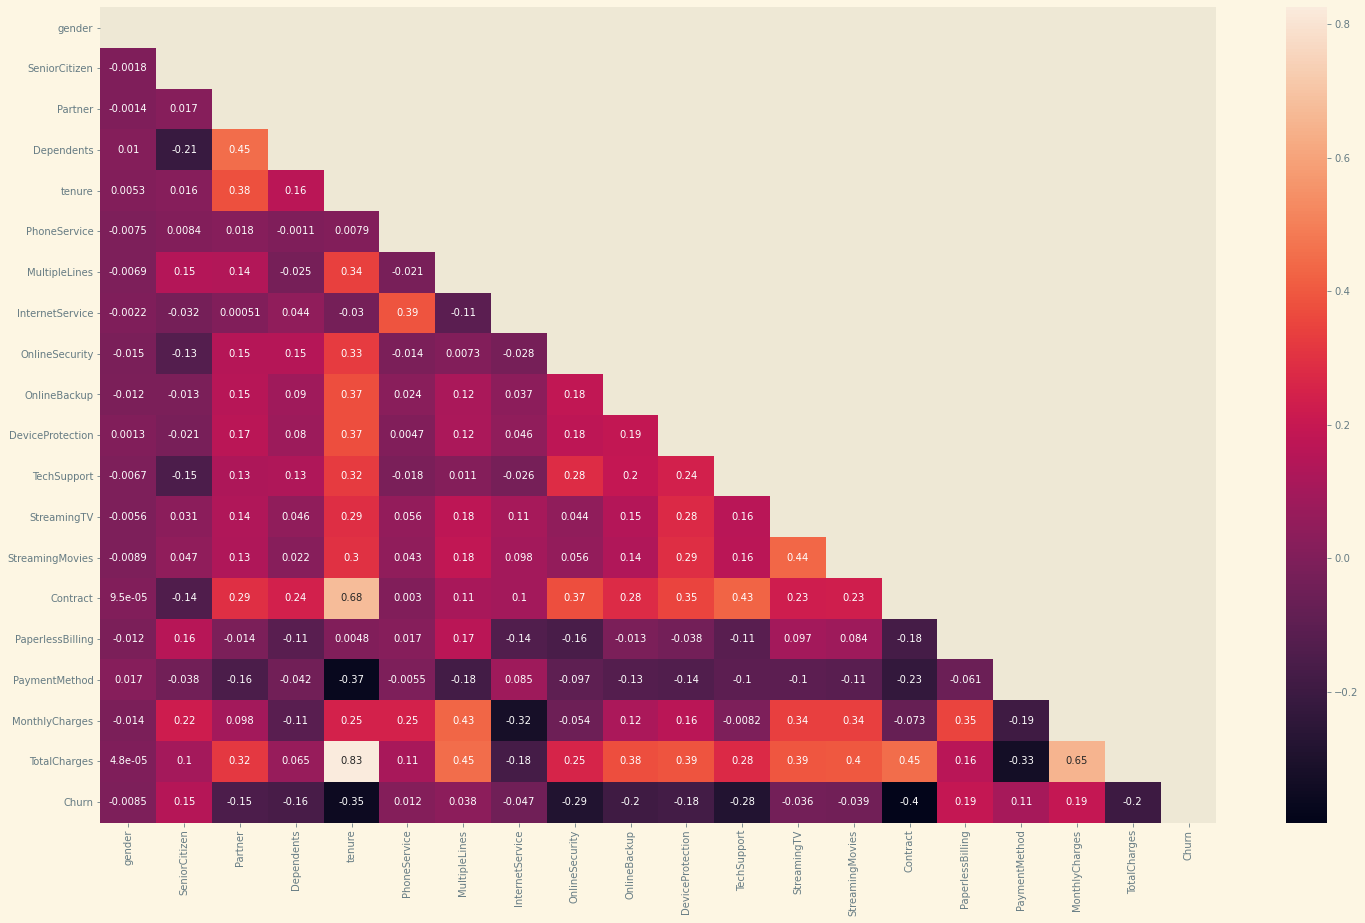

In [34]:
plt.figure(figsize=(25, 15))
mask = np.triu(data3.corr())

sns.heatmap(data=data3.corr(), mask=mask, annot=True)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [36]:
# random_state
rdm_st = 123

X = data3.drop(columns=[targ])
y = data3[targ]

# features = X.columns

In [37]:
my_scaler = StandardScaler()
X_scaled = my_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=rdm_st)

In [38]:
# models
models = {
    'log_model': LogisticRegression(random_state=rdm_st),
    'nb_model': GaussianNB(),
    'rf_model': RandomForestClassifier(random_state=rdm_st),
    'svc': SVC(random_state=rdm_st),
    'ada_boost': AdaBoostClassifier(random_state=rdm_st),
    'gr_boost': GradientBoostingClassifier(random_state=rdm_st),
    'xgb': XGBClassifier(n_estimators=5 , use_label_encoder=False, random_state=rdm_st),
}

In [39]:
for name, estimator in models.items():
    # fit 
    estimator.fit(X_train, y_train)
    
    # make predictions
    pred = estimator.predict(X_test)
    clf_report = classification_report(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    
    print(f"Estimator: {name}: \n Classification Report: \n{clf_report} \nConfusion Matrix: \n{conf_matrix} \n")
    print("==" * 30)

Estimator: log_model: 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       996
           1       0.73      0.54      0.62       411

    accuracy                           0.81      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.80      0.81      0.80      1407
 
Confusion Matrix: 
[[915  81]
 [188 223]] 

Estimator: nb_model: 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       996
           1       0.57      0.73      0.64       411

    accuracy                           0.76      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.79      0.76      0.77      1407
 
Confusion Matrix: 
[[774 222]
 [113 298]] 

Estimator: rf_model: 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       996
     

### Model Tuning 

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [41]:
rf_params = dict(n_estimators=np.arange(10, 160, 20), min_samples_leaf=np.arange(1, 15, 2))

In [42]:
rf = RandomForestClassifier(random_state=rdm_st)
rf_rdm_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, random_state=rdm_st, scoring='f1')

In [43]:
# fit 
rf_rdm_search.fit(X_train, y_train)

# best parameters
rf_rdm_search.best_params_

{'n_estimators': 50, 'min_samples_leaf': 13}

In [44]:
models1 = {
    'rf_model': RandomForestClassifier(n_estimators=50, min_samples_leaf=13, random_state=rdm_st),
#     'svc': SVC(C = 9.77, gamma = 0.16, random_state=rdm_st),
}

In [45]:
for name, estimator in models1.items():
    # fit 
    estimator.fit(X_train, y_train)
    
    # make predictions
    pred = estimator.predict(X_test)
    clf_report = classification_report(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    
    print(f"Estimator: {name}: \n Classification Report: \n{clf_report} \nConfusion Matrix: \n{conf_matrix} \n")
    print("==" * 30)

Estimator: rf_model: 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       996
           1       0.75      0.48      0.59       411

    accuracy                           0.80      1407
   macro avg       0.78      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407
 
Confusion Matrix: 
[[928  68]
 [212 199]] 

